# Cluster Set for Tableau
## 01. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

%matplotlib inline

## 02. Data

In [8]:
fset = pd.read_csv(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\race_lap_full.csv")
fset.head(1)

,Unnamed: 0,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,code,forename,surname,nationality,lap_num,lap_pos,lap_time,lap_milli,status,year
0,0,22131,900,825,1,20,4,2.0,2,2,...,MAG,Kevin,Magnussen,Danish,1,3,01:45.4,105402,Finished,2014


In [9]:
fset.columns

Index(['Unnamed: 0', 'resultId', 'raceId', 'driverId', 'constructorId',
       'number', 'grid', 'position', 'positionText', 'positionOrder', 'points',
       'laps', 'raceTimeMilli', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'constructorRef', 'name', 'con_nat',
       'driverRef', 'code', 'forename', 'surname', 'nationality', 'lap_num',
       'lap_pos', 'lap_time', 'lap_milli', 'status', 'year'],
      dtype='object')

In [14]:
fset = fset.drop(['positionText','fastestLapTime','constructorRef','name','con_nat','driverRef','code','forename','surname','nationality','lap_time','status','Unnamed: 0'],
               axis = 1)
fset.head(1)
sub = 0

In [15]:
fset = fset.dropna(axis = 0)

In [16]:
fset.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number               int64
grid                 int64
position           float64
positionOrder        int64
points             float64
laps                 int64
raceTimeMilli      float64
fastestLap         float64
rank                 int64
fastestLapSpeed    float64
statusId             int64
lap_num              int64
lap_pos              int64
lap_milli            int64
year                 int64
dtype: object

In [17]:
#determining optimal number of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(fset).score(fset) for i in range(len(kmeans))]
score

C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\clust

[-1.2146012965961027e+17,
 -4.615989355331061e+16,
 -2.324246987263627e+16,
 -1.2753288377561026e+16,
 -8536748471916468.0,
 -5375529437608724.0,
 -3894517300145667.0,
 -3107436009471811.0,
 -2626836769228726.0]

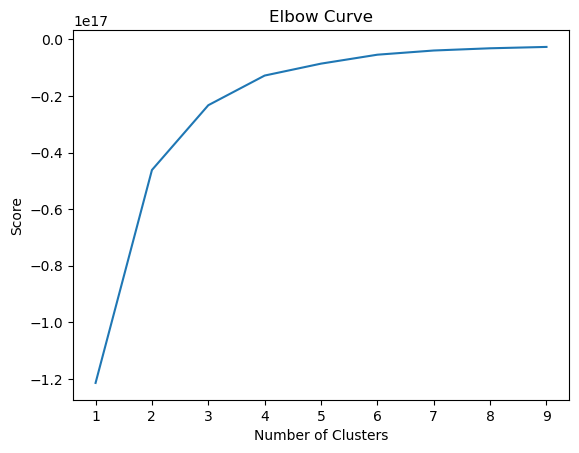

In [18]:
#plotting results
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [19]:
# 4 clusters

In [21]:
fset['lap_milli'].max()

3700606

In [22]:
fset.to_csv(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\race_lap_full.csv")

## 03. Clusters

In [20]:
#creating k-means object
kmeans = KMeans(n_clusters = 4) #assigning cluster
kmeans.fit(fset) #fitting model with data
fset['clusters'] = kmeans.fit_predict(fset)
fset.head()

C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,raceTimeMilli,fastestLap,rank,fastestLapSpeed,statusId,lap_num,lap_pos,lap_milli,year,clusters
0,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,1,3,105402,2014,0
1,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,2,3,97435,2014,0
2,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,3,3,97917,2014,0
3,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,4,3,96796,2014,0
4,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,5,3,96766,2014,0


In [ ]:
#plotting
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fset['raceTimeMilli'], y=fset['lap_milli'], hue=kmeans.labels_, s=100)
plt.xlabel('Race Time')
plt.ylabel('Lap Time')
plt.show